### Problem 1

1. Download and make sure you can run through and understand the Jupyter notebook on Ridge
Regression and Colinearity we saw in class.
2. What is the test error of the “zero-variance” solution, namely, the all-zeros solution?
3. The least-squares solution does not seem to do too well, because it has so much variance.
Still, it is unbiased. Show this empirically: generate many copies of the data, and for each
one, obtain the least-squares solution. Average these, to show that while each run produces a
beta hat that is very different, their average begins to look more and more like the true beta.
4. Alternatively, if one had access to lots of data, instead of computing the least-square solution
over smaller batches and then averaging these solutions as in the previous part of the problem,
an approach is to run a single least-squares regression over all the data. Which approach do
you think is better? Can you support your conclusion with experiments?


In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib

import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats.stats import pearsonr


%config InlineBackend.figure_format = 'retina' #set 'png' here when working on notebook
%matplotlib inline


In [20]:
y_test = []
X_test = np.random.randn(500,5)
p = 5; n = 500

    
def single_run(num_of_runs):
    X = np.random.randn(n,p)
    beta_hat_arr = []
    compound_beta_avg = []
    for i in range (num_of_runs):        
        c = np.dot(X[:,0:p-1],[2,3,-1,0.5]) + np.random.randn(1,n)/1000
        # c is a column that is approximately a linear combination of
        # columns 1, 2, 3 and 4. We set the 5th column of X equal to c
        X[:,p-1] = c
        beta = np.array([1,1,1,1,0])
        sigma = 0.3333
        y = np.dot(X,beta) + sigma*np.random.randn(n)
        # Now let's also generate a test data set
        n1 = 500 # number of testing points
        X_test = np.random.randn(n1,p)
        c_test = np.dot(X_test[:,0:p-1],[2,3,0,0.5]) + np.random.randn(1,n1)/1000;
        X_test[:,p-1] = c_test
        y_test = np.dot(X_test,beta) + sigma*np.random.randn(n1)
        # And remember that the formula for beta is
        # beta_hat = (X'X)^-1 X'y
        # and if we plug in: y = X beta* + Noise 
        # (where beta* is the true solution), we get
        # beta_hat = beta* + (X'X)^-1 X' Noise
        #
        # Multiplying the noise by (X'X)^-1 has the potential to blow up the noise
        # and this is exactly what happens.
        Z = np.dot(X.T,X)

        beta_hat = np.dot(np.dot(np.linalg.inv(Z),X.T),y.T)
        beta_hat_arr.append(beta_hat)
        compound_beta_avg.append((sum(beta_hat_arr)/i))
        X = np.random.randn(n,p)
        zero_variance_test_error = np.linalg.norm(np.dot(X_test,[0,0,0,0,0]) - y_test)
    
    beta_hat_arr = np.vstack(beta_hat_arr)
    compound_beta_avg = np.vstack(compound_beta_avg)
    beta_hat_avg = np.mean(beta_hat_arr, axis=0)
    return beta_hat_arr, beta_hat_avg, compound_beta_avg, zero_variance_test_error


In [21]:
runs = 1
beta_hat_arr, beta_hat_avg, compound_beta_avg, zero_var = single_run(runs)

C:\Users\geeta\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in true_divide


In [22]:
zero_var

45.39258432196288

In [23]:
runs = 5000
beta_hat_arr, beta_hat_avg, compound_beta_avg, zero_var = single_run(runs)

C:\Users\geeta\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in true_divide


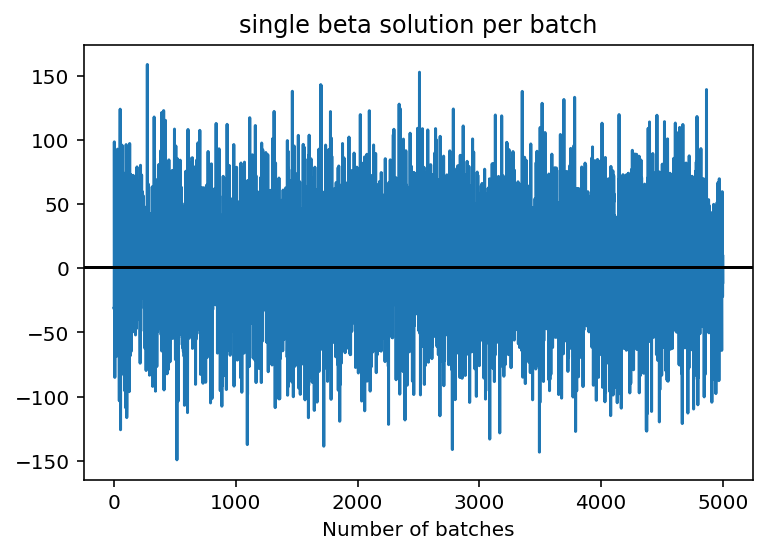

In [26]:

plt.title('single beta solution per batch')
plt.xlabel('Number of batches')
plt.plot(np.arange(0,runs), beta_hat_arr[:,1])
plt.axhline(1, 0, runs, color='k')
plt.show()

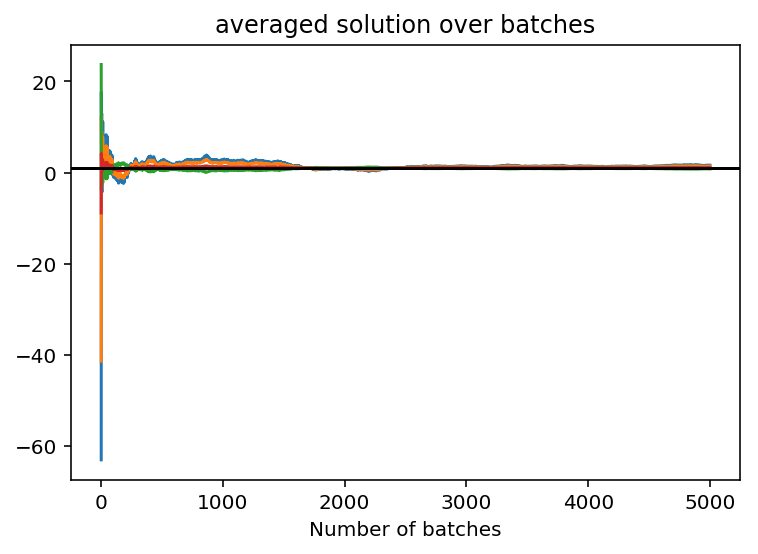

In [27]:
plt.title('averaged solution over batches')
plt.xlabel('Number of batches')
plt.plot(np.arange(0,runs), compound_beta_avg[:,1])
plt.plot(np.arange(0,runs), compound_beta_avg[:,0])
plt.plot(np.arange(0,runs), compound_beta_avg[:,2])
plt.plot(np.arange(0,runs), compound_beta_avg[:,3])
plt.axhline(1, 0, runs, color='k')
plt.show()

In [28]:
def comparison_run(n,p):
    all_X = np.random.randn(n,p)
    beta = np.array([1,1,1,1,0])
    sigma = 0.3333
    all_y = np.dot(all_X, beta) + sigma*np.random.randn(n)
    beta_hat_arr = []
    for i in range(0,n,500):
        X = all_X[i:i+500]
        c = np.dot(X[:,0:p-1],[2,3,-1,0.5]) 
        c = c + + np.random.randn(1,500)/1000
        # c is a column that is approximately a linear combination of
        # columns 1, 2, 3 and 4. We set the 5th column of X equal to c
        X[:,p-1] = c
        y = all_y[i:i+500]
        # And remember that the formula for beta is
        # beta_hat = (X'X)^-1 X'y
        # and if we plug in: y = X beta* + Noise 
        # (where beta* is the true solution), we get
        # beta_hat = beta* + (X'X)^-1 X' Noise
        #
        # Multiplying the noise by (X'X)^-1 has the potential to blow up the noise
        # and this is exactly what happens.
        Z = np.dot(X.T,X)
        beta_hat = np.dot(np.dot(np.linalg.inv(Z),X.T),y.T)
        beta_hat_arr.append(beta_hat)
#         compound_beta_avg.append((sum(beta_hat_arr)/i))
    #     zero_variance_test_error = np.linalg.norm(np.dot(X_test,[0,0,0,0,0]) - y_test)

    all_c = np.dot(all_X[:,0:p-1],[2,3,-1,0.5]) + np.random.randn(1,n)/1000
    all_X[:,p-1] = all_c
    all_Z = np.dot(all_X.T,all_X)
    all_beta_hat = np.dot(np.dot(np.linalg.inv(all_Z),all_X.T),all_y.T)

    beta_hat_arr = np.vstack(beta_hat_arr)
#     compound_beta_avg = np.vstack(compound_beta_avg)
    beta_hat_avg = np.mean(beta_hat_arr, axis=0)
#     print("mean beta " + str(beta_hat_avg))
    return beta_hat_avg, all_beta_hat

In [16]:
p = 5; n = 500000;
beta_hat_avg, all_beta_hat = comparison_run(n,p)

In [43]:
sample_sizes = [500000, 10000000, 20000000, 30000000, 50000000]
p = 5
betas = []
for n in sample_sizes:
    betas.append(comparison_run(n,p))

In [50]:
for i in range(len(sample_sizes)):
    print("Averaged solution for size " + str(sample_sizes[i]), end=''),
    print(betas[i][0])
    print("Solution for entire data size " + str(sample_sizes[i]), end=''),
    print(betas[i][1])

Averaged solution for size 500000[0.49748716 0.24515306 1.25144521 0.87459908 0.25176977]
Solution for entire data size 500000[ 1.68080065  2.02011011  0.65975068  1.1704108  -0.33986643]
Averaged solution for size 10000000[ 1.14474673  1.21718292  0.9277331   1.03645033 -0.07236183]
Solution for entire data size 10000000[ 1.02712259  1.04073746  0.98654249  1.00702569 -0.01355039]
Averaged solution for size 20000000[ 1.22810754  1.34216241  0.88594673  1.05705749 -0.114054  ]
Solution for entire data size 20000000[9.98426511e-01 9.97661112e-01 1.00078471e+00 9.99641790e-01
 7.81259687e-04]
Averaged solution for size 30000000[ 1.00653745  1.00974204  0.99678241  1.00158327 -0.00323539]
Solution for entire data size 30000000[ 1.1442605   1.21631576  0.92792107  1.03599821 -0.07209587]
Averaged solution for size 50000000[ 1.08750681  1.1313521   0.95630872  1.02187747 -0.04376713]
Solution for entire data size 50000000[0.80980889 0.71480009 1.0951488  0.95245581 0.09507914]


For sample data sizes, the averaged solutions performs better. For testing purposes, average over batches approach would yield sufficient results with low compute costs. But as dataset size increases the solution over entire dataset tends closer to the true beta values.

### Problem 2: Starting in Kaggle.
On October 22nd, we are opening a Kaggle competition made for this class. In that one, you will
be participating on your own. This is an intro to get us started, and also an excuse to work with
regularization and regression which we have been discussing.
1. Let’s start with our first Kaggle submission in a playground regression competition. Make
an account to Kaggle and find https://www.kaggle.com/c/house-prices-advanced-regressiontechniques/
2. Follow the data preprocessing steps from https://www.kaggle.com/apapiu/house-prices-advancedregression-techniques/regularized-linear-models. Then run a ridge regression using α = 0.1.
Make a submission of this prediction, what is the RMSE you get?
(Hint: remember to exponentiate np.expm1(ypred) your predictions).
3. Compare a ridge regression and a lasso regression model. Optimize the alphas using cross
validation. What is the best score you can get from a single ridge regression model and from
a single lasso model?
4. Plot the l0 norm (number of nonzeros) of the coefficients that lasso produces as you vary the
strength of regularization parameter alpha.
5. Add the outputs of your models as features and train a ridge regression on all the features
plus the model outputs (This is called Ensembling and Stacking). Be careful not to overfit.
What score can you get? (We will be discussing ensembling more, later in the class, but you
can start playing with it now).

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
all_data = pd.concat((train.loc[:,'MSSubClass':'SaleCondition'],
                      test.loc[:,'MSSubClass':'SaleCondition']))

In [3]:
#log transform the target:
train["SalePrice"] = np.log1p(train["SalePrice"])

#log transform skewed numeric features:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

all_data[skewed_feats] = np.log1p(all_data[skewed_feats])

all_data = pd.get_dummies(all_data)
all_data = all_data.fillna(all_data.mean())
X_train = all_data[:train.shape[0]]
X_test = all_data[train.shape[0]:]
y = train.SalePrice

C:\Users\geeta\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log1p
  # This is added back by InteractiveShellApp.init_path()


#### Ridge and Lasso Regression Models

In [4]:
from sklearn.linear_model import Ridge, Lasso, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score

def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y, scoring="neg_mean_squared_error", cv = 5))
    return rmse

In [5]:
model_ridge = Ridge()

In [6]:
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]

Text(0,0.5,'rmse')

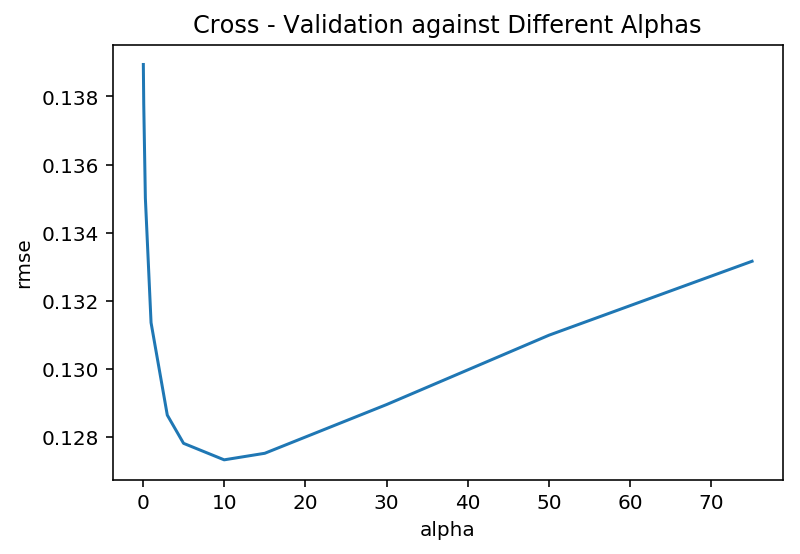

In [7]:
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Cross - Validation against Different Alphas")
plt.xlabel("alpha")
plt.ylabel("rmse")

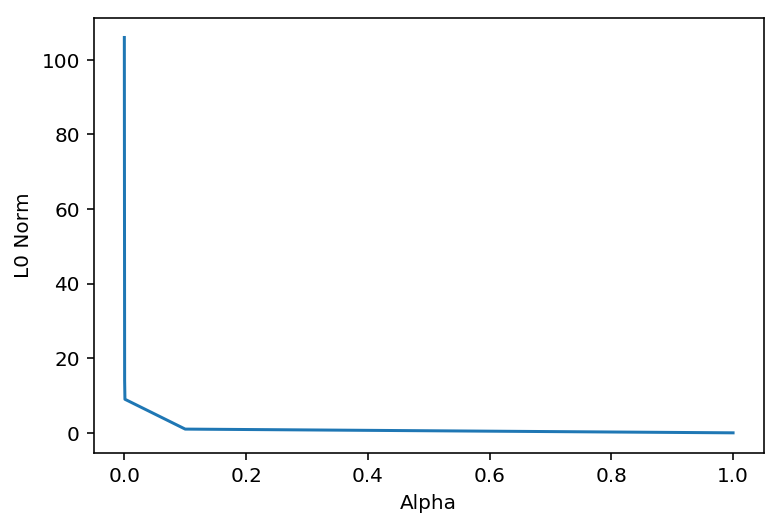

In [8]:
alphas = [1, 0.1, 0.001, 0.0005, 1e-5]
cv_lasso = [rmse_cv(LassoCV(alpha).fit(X_train,y)).mean() for alpha in alphas]
coef = [LassoCV(alpha).fit(X_train,y).coef_ for alpha in alphas]
l0 = list()
for array in coef:
    l0.append(sum(array != 0))
plt.plot(alphas,l0)
plt.xlabel('Alpha')
plt.ylabel('L0 Norm')
plt.show()

We will now "stack" the models by feeding the predictions of one model into another model. If you use the data point label to train on the model, then there is some leakage of the labels when training the second model.

We split the data set into 5 folds. For each fold, we make a prediction on the data in this fold using a training set made up of the other 4 folds.

In [9]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
X_train_mat = X_train.as_matrix()
kf = KFold(5)
n, d = X_train_mat.shape
X_stacked = np.concatenate([X_train_mat, np.zeros([n, 2])], axis=1)
ridge_mse = []
lasso_mse = []
for split_idx, val_idx in kf.split(X_train_mat, y):
  X_split = X_train_mat[split_idx]
  y_split = y[split_idx]
  X_val = X_train_mat[val_idx]
  y_val = y[val_idx]
  
  ridge = Ridge(alpha=10)
  ridge.fit(X_split, y_split)
  ridge_pred = ridge.predict(X_val)
  X_stacked[val_idx, -2] = ridge_pred
  ridge_mse.append(mean_squared_error(y_val, ridge_pred))
  
  lasso = Lasso(alpha=0.0005)
  lasso.fit(X_split, y_split)
  lasso_pred = lasso.predict(X_val)
  lasso_mse.append(mean_squared_error(y_val, lasso_pred))
  X_stacked[val_idx, -1] = lasso_pred
print('Ridge MSE: {}'.format(np.mean(ridge_mse)))
print('Lasso MSE: {}'.format(np.mean(lasso_mse)))
ridge = Ridge(alpha=1.0)
stack_mse= -cross_val_score(ridge, X_stacked, y, scoring="neg_mean_squared_error", cv = 5)
print('Stacked MSE: {}'.format(np.mean(stack_mse)))

C:\Users\geeta\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


Ridge MSE: 0.016465160966126876
Lasso MSE: 0.015295741041401478
Stacked MSE: 0.012207897337088627


We see that stacking decreases the error. If we use the predictions from the model that had access to the labels of the data points we see that the error increases after stacking due to overfitting.

In [10]:
from sklearn.model_selection import train_test_split

ridge_mse = []
lasso_mse = []
stack_mse = []

for split_idx, val_idx in kf.split(X_train_mat, y):
  X_split = X_train_mat[split_idx]
  y_split = y[split_idx]
  X_val = X_train_mat[val_idx]
  y_val = y[val_idx]
  

  ridge = Ridge(alpha=10)
  ridge.fit(X_split, y_split)
  ridge_stack = ridge.predict(X_train)
  ridge_pred = ridge.predict(X_val)
  ridge_mse.append(mean_squared_error(y_val, ridge_pred))

  lasso = Lasso(alpha=0.0005)
  lasso.fit(X_split, y_split)
  lasso_stack = lasso.predict(X_train)
  lasso_pred = lasso.predict(X_val)
  lasso_mse.append(mean_squared_error(y_val, lasso_pred))

  X_stacked = np.hstack((X_train_mat, np.reshape(ridge_stack,(-1,1)), np.reshape(lasso_stack,(-1,1))))
  stack = Ridge(alpha=1.0)
  stack.fit(X_split, y_split)
  stack_pred = stack.predict(X_val)
  stack_mse.append(mean_squared_error(y_val, stack_pred))
  
print('Ridge MSE: {}'.format(np.mean(ridge_mse)))
print('Lasso MSE: {}'.format(np.mean(lasso_mse)))
print('Stacked MSE: {}'.format(np.mean(stack_mse)))

Ridge MSE: 0.016465160966126876
Lasso MSE: 0.015295741041401478
Stacked MSE: 0.017524852974200627
